In [1]:
import awkward as ak
import hist
import mplhep as hep
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
#plt.style.use(hep.style.CMS)

In [2]:
obs_2017     = ak.Array([1.0, 23.0, 1.0, 16.0,  7.0, 14.0])
pred_2017    = ak.Array([1.2, 21.7, 0.9, 18.0,  7.4, 15.4])
unc_2017     = ak.Array([0.3,  4.2, 0.1,  2.1,  1.2,  1.3])

obs_2018     = ak.Array([1.0, 17.0, 1.0, 34.0, 14.0, 23.0])
pred_2018    = ak.Array([1.5, 33.3, 1.4, 27.5,  8.4, 22.3])
unc_2018     = ak.Array([0.3,  5.5, 0.2,  2.7,  1.3,  1.6])

In [3]:
def pull(obs, pred, unc, unc_obs=False):
    if unc_obs:
        unc = unc + np.sqrt(obs)
    return (obs - pred)/unc

In [4]:
pulls_2017 = pull(obs_2017, pred_2017, unc_2017)
pulls_2018 = pull(obs_2018, pred_2018, unc_2018)
print(f"2017: {pulls_2017}")
print(f"2018: {pulls_2018}")

2017: [-0.667, 0.31, 1, -0.952, -0.333, -1.08]
2018: [-1.67, -2.96, -2, 2.41, 4.31, 0.437]


In [5]:
h = hist.Hist(hist.axis.Regular(17, -8, 8, name="pulls"))
h.fill(pulls_2017)
h.fill(pulls_2018)

Hist(Regular(17, -8, 8, name='pulls'), storage=Double()) # Sum: 12.0

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f77b38d7a60>, errorbar=None, legend_artist=None)]

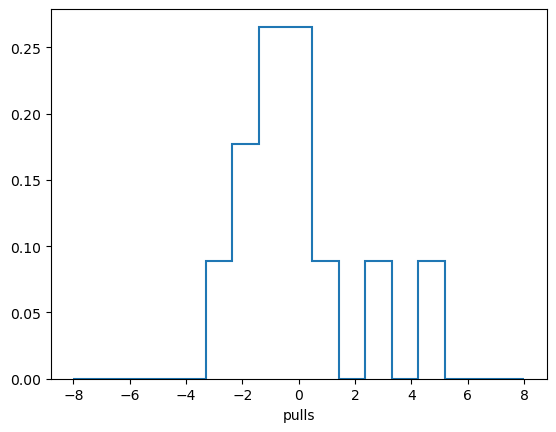

In [6]:
hep.histplot(h, yerr=False, density=True)

(FitResultArtists(line=<matplotlib.lines.Line2D object at 0x7f77ab7ae700>, errorbar=<ErrorbarContainer object of 3 artists>, band=<matplotlib.collections.PolyCollection object at 0x7f77ab7aeb50>),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f77ab7b9820>, errorbar=<ErrorbarContainer object of 3 artists>))

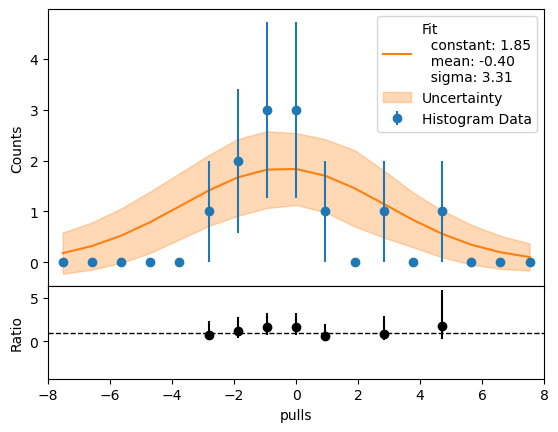

In [7]:
h.plot_ratio("gaus", fit_fmt="{name}: {value:.2f}")

In [8]:
pulls_all = ak.concatenate([pulls_2017, pulls_2018])
stats.goodness_of_fit(
    stats.norm,
    pulls_all,
    known_params={
        "loc": 0.0,
        "scale": 1.0,
    },
)

GoodnessOfFitResult(fit_result=  params: FitParams(loc=0.0, scale=1.0)
 success: True
 message: 'The fit was performed successfully.', statistic=2.645758678675051, pvalue=0.0428, null_distribution=array([1.35422194, 0.86500889, 1.78110653, ..., 0.37122876, 0.86669259,
       0.68596164]))

Repeat above exercise while including poisson uncertainty on observation

In [9]:
pulls_2017 = pull(obs_2017, pred_2017, unc_2017, unc_obs = True)
pulls_2018 = pull(obs_2018, pred_2018, unc_2018, unc_obs = True)
print("Including observation uncertainty")
print(f"2017: {pulls_2017}")
print(f"2018: {pulls_2018}")

Including observation uncertainty
2017: [-0.154, 0.145, 0.0909, -0.328, -0.104, -0.278]
2018: [-0.385, -1.69, -0.333, 0.762, 1.11, 0.109]


In [10]:
h = hist.Hist(hist.axis.Regular(17, -4, 4, name="pulls"))
h.fill(pulls_2017)
h.fill(pulls_2018)

Hist(Regular(17, -4, 4, name='pulls'), storage=Double()) # Sum: 12.0

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f77ab6a0820>, errorbar=None, legend_artist=None)]

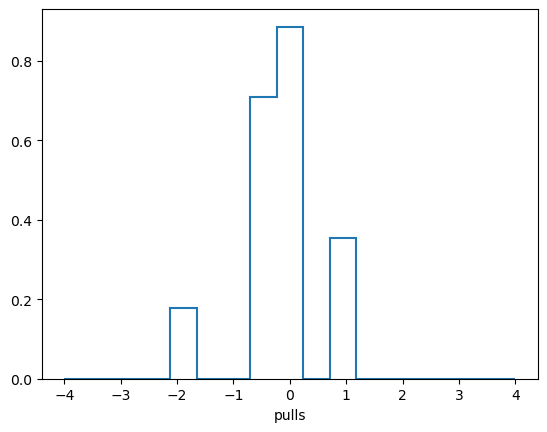

In [11]:
hep.histplot(h, yerr=False, density=True)

(FitResultArtists(line=<matplotlib.lines.Line2D object at 0x7f77ab5fd1c0>, errorbar=<ErrorbarContainer object of 3 artists>, band=<matplotlib.collections.PolyCollection object at 0x7f77ab5fd370>),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f77ab5ee9a0>, errorbar=<ErrorbarContainer object of 3 artists>))

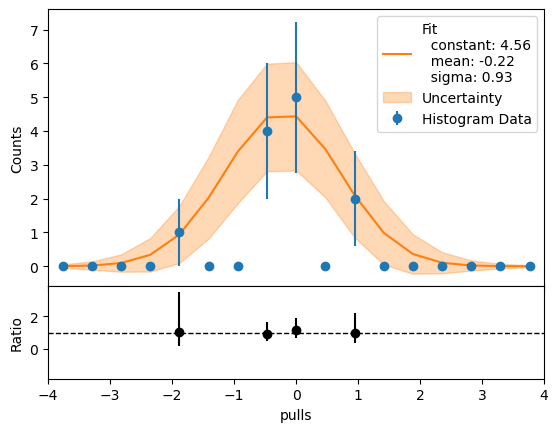

In [12]:
h.plot_ratio("gaus", fit_fmt="{name}: {value:.2f}")

In [13]:
pulls_all = ak.concatenate([pulls_2017, pulls_2018])
stats.goodness_of_fit(
    stats.norm,
    pulls_all,
    known_params={
        "loc": 0.0,
        "scale": 1.0,
    }
)

GoodnessOfFitResult(fit_result=  params: FitParams(loc=0.0, scale=1.0)
 success: True
 message: 'The fit was performed successfully.', statistic=1.0564653506588986, pvalue=0.3168, null_distribution=array([0.77283589, 0.20569421, 1.04062565, ..., 1.00595575, 1.3432735 ,
       0.60608745]))